In [1]:
# importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform


import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

In [2]:
# importing the Elastic Modulus as the output 
# Data are imported from the 3-point bending experiment 

E=np.array ([54.84,21.9,
32.43,
23.13,
64.28,
17.95,
17.67,
39.44,
9.33,
40.68,
26.56,
32.69,
57.93,
67.88,
222.46,
])

# repeating the E for the 8 different augmented images (rotated, mirrored, etc.) as they are having the same E 
y=np.repeat(E, 8)

In [3]:
E[1]

21.9

In [17]:
dataset = pd.read_csv('train_image_256.csv', header=None)
y=dataset.iloc[:, 0].values
X=dataset.iloc[:,1:10497].values

In [18]:
pd.DataFrame(dataset)

,0,1,2,3,4,5,6,7,8,9,...,10487,10488,10489,10490,10491,10492,10493,10494,10495,10496
0,54.84,23.0,150.0,158.0,123.0,0.0,0.0,0.0,0.0,0.0,...,57.0,92.0,112.0,110.0,90.0,21.0,0.0,0.0,0.0,0.0
1,54.84,24.0,167.0,170.0,168.0,55.0,0.0,0.0,0.0,0.0,...,124.0,124.0,124.0,121.0,77.0,1.0,0.0,0.0,0.0,0.0
2,54.84,0.0,164.0,176.0,175.0,104.0,0.0,0.0,0.0,0.0,...,124.0,124.0,124.0,115.0,36.0,0.0,0.0,0.0,0.0,0.0
3,54.84,0.0,103.0,176.0,176.0,155.0,2.0,0.0,0.0,0.0,...,124.0,124.0,123.0,94.0,11.0,0.0,0.0,0.0,0.0,0.0
4,54.84,0.0,44.0,168.0,176.0,172.0,101.0,0.0,0.0,0.0,...,124.0,124.0,112.0,63.0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,222.46,34.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,...,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,122.0,13.0
701,222.46,34.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,...,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,122.0,13.0
702,222.46,34.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,...,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,122.0,13.0
703,222.46,34.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,...,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,122.0,13.0


### Normalization 

In [19]:
X = X / 255.0

### Reshape 

In [20]:
# Reshape image in 3 dimensions (height = 41px, width = 256px , canal = 1)
# canal = 1 => For gray scale
X = X.reshape(-1,41,256,1)

In [22]:
X.shape

(705, 41, 256, 1)

### Split training and valdiation set 

In [23]:
# Split the train and the validation set for the fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((634, 41, 256, 1), (71, 41, 256, 1), (634,), (71,))

### Standardization

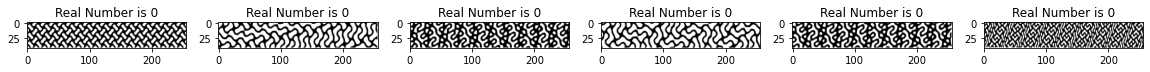

In [26]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

### Importing Libraries for CNN 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

In [83]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(41,256,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(41,256,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(1))
    
model.compile(loss="mean_absolute_error", optimizer="adam")

In [84]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 39, 254, 64)       640       
                                                                 
 conv2d_31 (Conv2D)          (None, 37, 252, 64)       36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 18, 126, 64)      0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 18, 126, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 124, 128)      73856     
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 122, 128)     

### Image Augmentation 


In [85]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.01, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=20)
test_gen = datagen.flow(X_test, y_test, batch_size=20)


In [86]:
# Fit the model
history= model.fit(x = train_gen, validation_data = test_gen, epochs = 30) 

Epoch 1/30
32/32 [==============================] - 33s 1s/step - loss: 27.9700 - val_loss: 35.5597
Epoch 2/30
32/32 [==============================] - 34s 1s/step - loss: 17.0675 - val_loss: 26.6754
Epoch 3/30
32/32 [==============================] - 34s 1s/step - loss: 15.2947 - val_loss: 62.7461
Epoch 4/30
32/32 [==============================] - 32s 1s/step - loss: 16.5089 - val_loss: 114.5729
Epoch 5/30
32/32 [==============================] - 33s 1s/step - loss: 16.0358 - val_loss: 20.1507
Epoch 6/30
32/32 [==============================] - 34s 1s/step - loss: 9.8156 - val_loss: 32.3978
Epoch 7/30
32/32 [==============================] - 36s 1s/step - loss: 9.7719 - val_loss: 18.0003
Epoch 8/30
32/32 [==============================] - 34s 1s/step - loss: 10.4826 - val_loss: 28.8353
Epoch 9/30
32/32 [==============================] - 36s 1s/step - loss: 8.9341 - val_loss: 18.1292
Epoch 10/30
32/32 [==============================] - 34s 1s/step - loss: 8.3895 - val_loss: 21.3394
Ep

### Evaluate the model

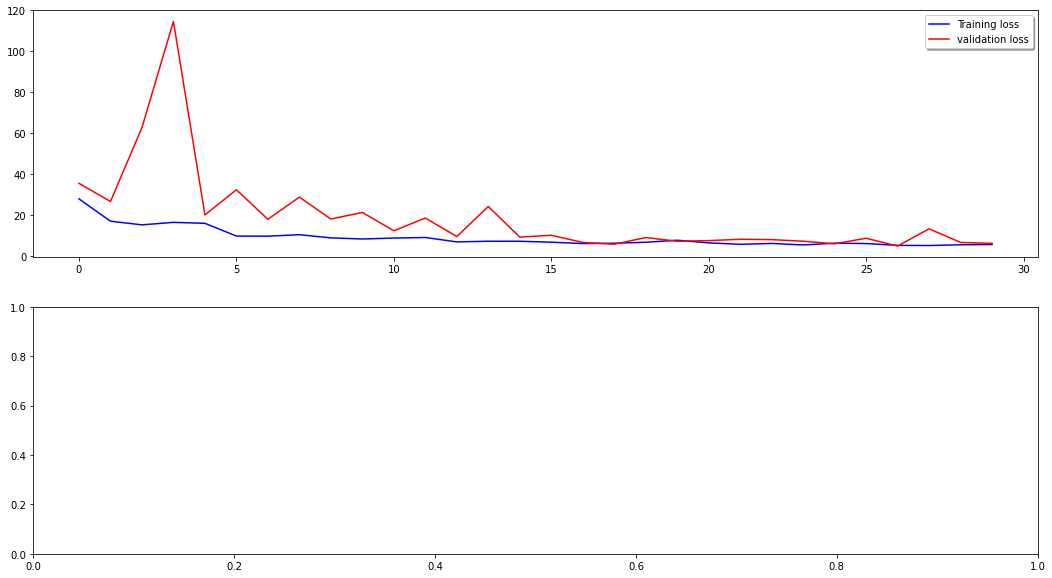

In [90]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

3/3 [==============================] - 1s 145ms/step


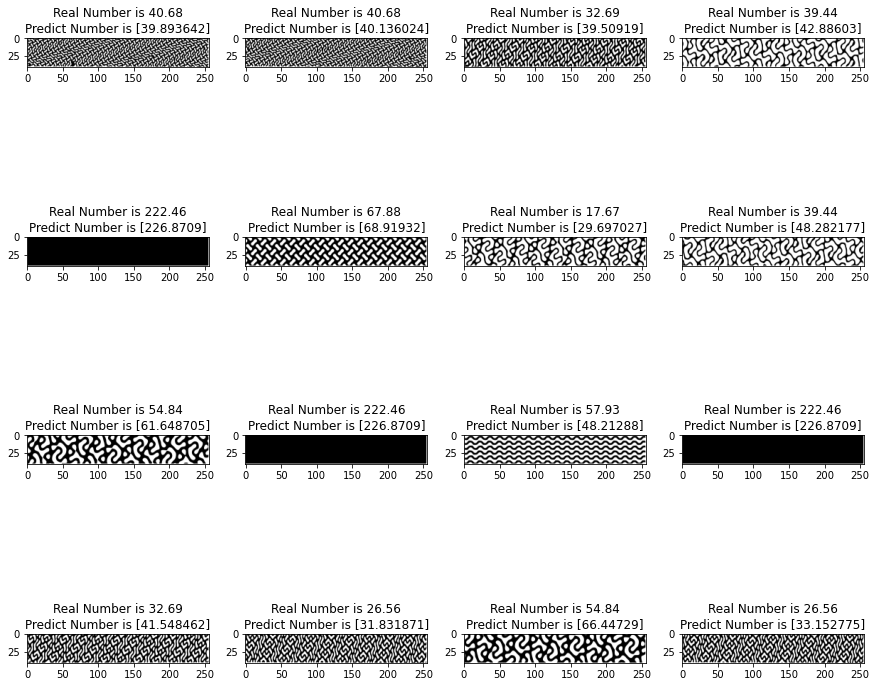

In [92]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 41, 256)

fig, axis = plt.subplots(4, 4, figsize=(15, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i]}\nPredict Number is {y_pred[i]}");